## Part B: Data Cleaning
### Importing the essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Using pandas to read the csv file of library inventory

In [3]:
df = pd.read_csv("F:\Myntra.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65900 entries, 0 to 65899
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  65900 non-null  int64 
 1   Brand_name  65900 non-null  object
 2   Product     65900 non-null  object
 3   Size        65900 non-null  object
 4   Price       65900 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.5+ MB


### Dataset

In [5]:
df

,Unnamed: 0,Brand_name,Product,Size,Price
0,0,HRX by Hrithik Roshan,Printed Cotton Pure Cotton T-shirt,"S, M, L, XL, XXL",Rs. 349Rs. 699(50% OFF)
1,1,Huetrap,Typography Print T-shirt,"S, M, L, XL, XXL",Rs. 395Rs. 1099(64% OFF)
2,2,Moda Rapido,Printed Cotton Pure Cotton T-shirt,"S, M, L, XL, XXL",Rs. 314Rs. 899(65% OFF)
3,3,HRX by Hrithik Roshan,Typography Cotton T-shirt,"S, M, L, XL, XXL",Rs. 349Rs. 699(50% OFF)
4,4,H&M,Men Solid Regular Fit T-shirt,"3XS, XS, M, L, XXL, 3XL",Rs. 399
...,...,...,...,...,...
65895,65895,Ed Hardy,Printed Polo Pure Cotton T-shirt,"S, M, L, XL, XXL",Rs. 999Rs. 1999(50% OFF)
65896,65896,U.S. Polo Assn.,Tshirts,"S, M, L, XL, XXL",Rs. 849Rs. 1699(50% OFF)
65897,65897,ColorPlus,Striped Polo Collar T-shirt,"XS, S, M, L, XL",Rs. 2299
65898,65898,Pepe Jeans,Printed Polo Collar Pure Cotton T-shirt,"S, M, L, XL, XXL",Rs. 679Rs. 1699(60% OFF)


### Making a copy of a dataset

In [6]:
df_copy = df.copy()

### Spliting the 'Price' column into 'Sale_price', 'MRP', 'Dis_percent' columns

In [7]:
p_split = df_copy.Price.str.split('Rs. ', 2, expand=True)

In [8]:
p_split[0].unique()

array([''], dtype=object)

In [9]:
p_split = p_split.drop(columns=0)

In [10]:
p_split[['3', '4']] = p_split[2].str.split('Rs. ', expand=True)

In [11]:
p_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65900 entries, 0 to 65899
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       65900 non-null  object
 1   2       56431 non-null  object
 2   3       56431 non-null  object
 3   4       1238 non-null   object
dtypes: object(4)
memory usage: 2.0+ MB


In [12]:
p_split = p_split.drop(columns=2)

In [13]:
p_split['4'] = p_split['4'].str[:-4]

In [14]:
p_split[['5', '6']] = p_split['3'].str.split('(', expand=True)

In [15]:
p_split = p_split.drop(columns='3')

In [16]:
p_split['4'] = p_split['4'].str[:-1]

In [17]:
p_split['4'] = pd.to_numeric(p_split['4'], downcast='integer')
p_split['5'] = pd.to_numeric(p_split['5'], downcast='integer')

In [18]:
p_split['Result'] = round(p_split['4']/p_split['5']*100)

In [19]:
p_split = p_split.drop(columns='4')

In [20]:
p_split[['7', '8']] = p_split['6'].str.split('%', expand=True)

In [21]:
p_split = p_split.drop(columns=['8','6'])

In [22]:
p_split['7'] = p_split['7'].str.strip()

In [23]:
p_split['7'] = pd.to_numeric(p_split['7'], downcast='integer')

In [24]:
p_split['Result'] = p_split['Result'].fillna(value=0) 
p_split['5'] = p_split['5'].fillna(value=0) 
p_split['7'] = p_split['7'].fillna(value=0) 

In [25]:
p_split['percent'] = p_split['7'].astype(int) + p_split['Result'].astype(int)

In [26]:
p_split = p_split.drop(columns=['Result', '7'])

In [27]:
p_split['5'] = p_split['5'].astype(int)
p_split[1] = p_split[1].astype(int)

In [28]:
df_copy[['Sale_price', 'MRP', 'Dis_percent']] = p_split
df_copy = df_copy.drop(columns=['Price', 'Unnamed: 0'])

In [29]:
df_copy['MRP'] = df_copy['MRP'].replace(0, np.nan)
df_copy['MRP'] = df_copy['MRP'].fillna(df_copy['Sale_price']).astype(int)

In [30]:
df_copy.head()

,Brand_name,Product,Size,Sale_price,MRP,Dis_percent
0,HRX by Hrithik Roshan,Printed Cotton Pure Cotton T-shirt,"S, M, L, XL, XXL",349,699,50
1,Huetrap,Typography Print T-shirt,"S, M, L, XL, XXL",395,1099,64
2,Moda Rapido,Printed Cotton Pure Cotton T-shirt,"S, M, L, XL, XXL",314,899,65
3,HRX by Hrithik Roshan,Typography Cotton T-shirt,"S, M, L, XL, XXL",349,699,50
4,H&M,Men Solid Regular Fit T-shirt,"3XS, XS, M, L, XXL, 3XL",399,399,0


## Part C: Data Visualization

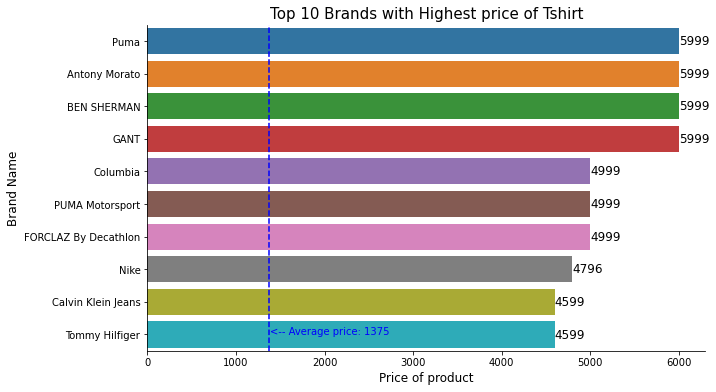

In [31]:
p1 = df_copy.groupby('Brand_name').max('Sale_price').sort_values(by='Sale_price', ascending=False)
p1.reset_index(level=0, inplace=True)
plt.figure(figsize=(10, 6))
p1plot = sns.barplot(data=p1.head(10), x='Sale_price', y='Brand_name', ci=False)
plt.title('Top 10 Brands with Highest price of Tshirt', fontsize=15)
plt.xlabel('Price of product', fontsize=12)
plt.ylabel('Brand Name', fontsize=12)
p1plot.axvline(x=p1['Sale_price'].mean(), color='b', linestyle='--')
plt.annotate('<-- Average price: '+ str(round(p1['Sale_price'].mean())), xy=[p1['Sale_price'].mean()+10,9],color='b')
p1plot.bar_label(p1plot.containers[0], label_type='edge', fontsize=12)
sns.despine()
plt.show()

### Observation P1:
#### 1. Puma is selling Highest Price T-shirt for Rs.5999 (Original Price: Rs.6999)
#### 2. Three brands are selling T-shirt for and beyond 5k range - Puma, Antony Morato and Ben Sherman
#### 3. Average price after discount of all the brands is Rs. 1375

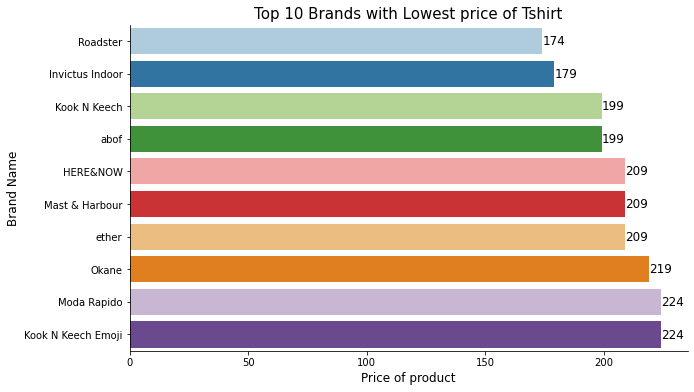

In [32]:
p2 = df_copy.groupby('Brand_name').min('Sale_price').sort_values(by='Sale_price', ascending=True)
p2.reset_index(level=0, inplace=True)
color2 = sns.color_palette("Paired", 10)
plt.figure(figsize=(10, 6))
p2plot = sns.barplot(data=p2.head(10), x='Sale_price', y='Brand_name', ci=False, palette=color2)
plt.title('Top 10 Brands with Lowest price of Tshirt', fontsize=15)
plt.xlabel('Price of product', fontsize=12)
plt.ylabel('Brand Name', fontsize=12)
p2plot.bar_label(p2plot.containers[0], label_type='edge', fontsize=12)
sns.despine()
plt.show()

### Observation P2:
#### 1. Roadster is selling lowest Price T-shirt for Rs.174 (Original Price: Rs.399)
#### 2. Four brands are selling T-shirt below Rs.200 after Discount  - Roadster, Invictus Indoor, Kook N Keech and Abof
#### 3. Kook N Keech brand listed twices in lowest price category

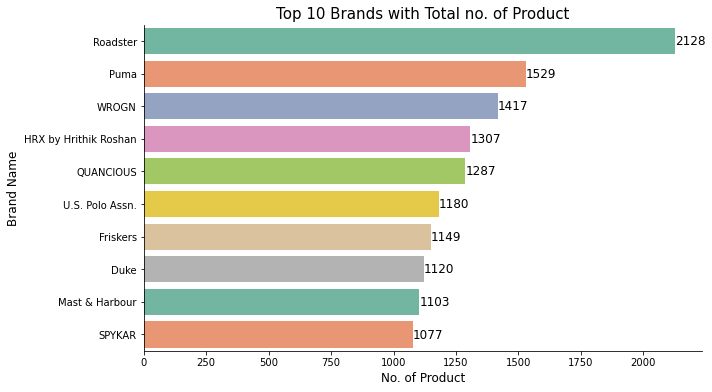

In [35]:
p3 = df_copy.groupby('Brand_name').count().sort_values(by='Product', ascending=False)
p3.reset_index(level=0, inplace=True)
plt.figure(figsize=(10, 6))
color3 = sns.color_palette('Set2')
p3plot = sns.barplot(data=p3.head(10), x='Product', y='Brand_name', palette=color3)
plt.title('Top 10 Brands with Total no. of Product', fontsize=15)
plt.xlabel('No. of Product', fontsize=12)
plt.ylabel('Brand Name', fontsize=12)
p3plot.bar_label(p3plot.containers[0], label_type='edge', fontsize=12)
sns.despine()
plt.show()

### Observation P3:
#### 1. Roadster listed highest T-shirt count of 2128 T-shirts.
#### 2. Difference between fifth brand (Quancious) and top brand(Roadster) is 2128 - 1287 = 841 Products.
#### 3. 11.71% of total products are listed by five brands - Roadster, Puma, Wrogn, HRX by Hrithik Roshan, Quancious

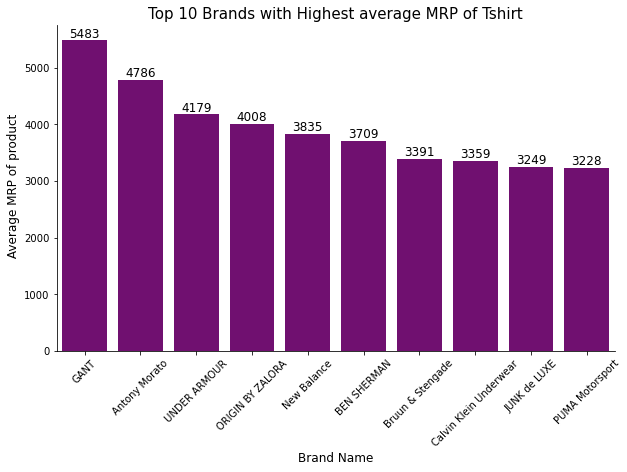

In [81]:
p4 = df_copy.groupby('Brand_name').mean('MRP').sort_values(by='MRP', ascending=False).round()
p4.reset_index(level=0, inplace=True)
plt.figure(figsize=(10, 6))
p4plot = sns.barplot(data=p4.head(10), x='Brand_name', y='MRP', color='purple')
plt.title('Top 10 Brands with Highest average MRP of Tshirt', fontsize=15)
plt.xlabel('Brand Name', fontsize=12)
plt.xticks(rotation = 45)
plt.ylabel(' Average MRP of product', fontsize=12)
p4plot.bar_label(p4plot.containers[0], label_type='edge', fontsize=12)
sns.despine()
plt.show()

### Observation P4:
#### 1. Gant T-shirt MRP is an average of Rs.5483 followed by Antony Morato for Rs.4786
#### 2. Average price of all the brands are below Rs.5500 

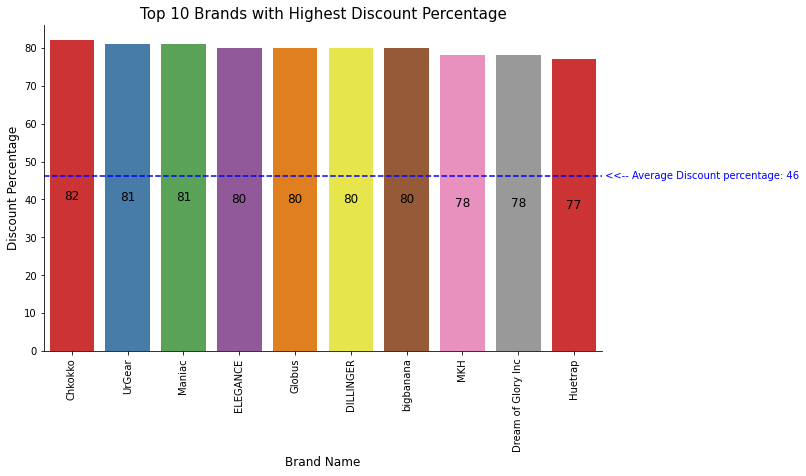

In [59]:
p5 = df_copy.groupby('Brand_name').max('Dis_percent').sort_values(by='Dis_percent', ascending=False)
p5.reset_index(level=0, inplace=True)
color5 = sns.color_palette('Set3', 10)
plt.figure(figsize=(10, 6))
p5plot = sns.barplot(data=p5.head(10), x='Brand_name', y='Dis_percent', ci=False, palette=color4)
plt.title('Top 10 Brands with Highest Discount Percentage', fontsize=15)
plt.xlabel('Brand Name', fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel('Discount Percentage', fontsize=12)
plt.axhline(y=p5['Dis_percent'].mean(), linestyle='--', color='b')
p5plot.annotate(text=' <<-- Average Discount percentage: '+str(round(p5['Dis_percent'].mean())), xy=[9.5,45.5], color='b')
p5plot.bar_label(p5plot.containers[0], label_type='center', fontsize=12)
sns.despine()
plt.show()

### Observations P5:
#### 1. Chkokko gives highest percentage of discount - 82%
#### 2. Top 5 brands are Providing Percentage discount with 1% of difference.80-81-82
#### 3. There is a pattern of number of brands providing same percent of discount
#### 4. Average discount percentage provided in T-shirt is - 46%

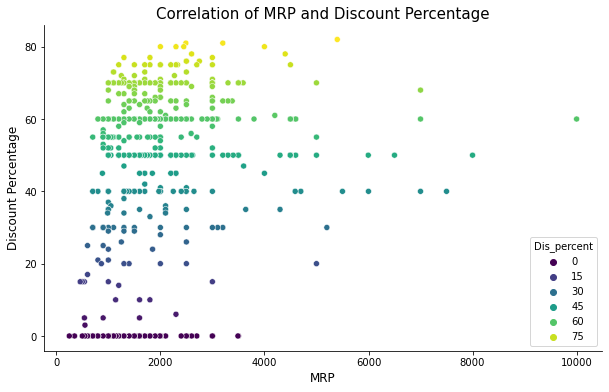

In [60]:
p6 = df_copy.groupby('Brand_name').max().sort_values(['Dis_percent', 'MRP'], ascending=False)
p6.reset_index(level=0, inplace=True)
color6 = sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(10,6))
sns.scatterplot(data=p6, x='MRP', y='Dis_percent', hue='Dis_percent', palette=color6)
plt.title('Correlation of MRP and Discount Percentage', fontsize=15)
plt.xlabel('MRP', fontsize=12)
plt.ylabel('Discount Percentage', fontsize=12)
sns.despine()
plt.show()

### Observation P6:
#### 1. Highest number of discounts are provided between the price range of Rs. 250 to Rs. 4000
#### 2. As the price increases, the number discounts provided by brands decreases.
#### 3. There is not much discounts in Tshirt above the price Rs. 80000